In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import io
import pandas as pd

In [14]:
data = pd.read_csv('/content/gdrive/My Drive/calories (1).csv')

In [15]:
data

,Item,TimeId,Calories,Date New
0,Dosa,1.0,400.0,1/1/2024
1,Corn Flakes,1.0,250.0,1/1/2024
2,Sambar Rice,2.0,220.0,1/1/2024
3,Curd Rice,2.0,380.0,1/1/2024
4,Potato Fry,2.0,250.0,1/1/2024
...,...,...,...,...
110,Snickers,3.0,150.0,1/15/2024
111,Curd Rice,4.0,200.0,1/15/2024
112,Milk,4.0,150.0,1/15/2024
113,Banana,4.0,75.0,1/15/2024


In [32]:
timeData = pd.read_csv('/content/gdrive/My Drive/time_day (1).csv')

In [17]:
timeData

,timeId,time
0,1,Breakfast
1,2,Lunch
2,3,Snack
3,4,Dinner


In [20]:
# see what type of columns are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item      114 non-null    object 
 1   TimeId    114 non-null    float64
 2   Calories  114 non-null    float64
 3   Date New  114 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.7+ KB


In [21]:
# first 15 rows of the data
data.head(15)

,Item,TimeId,Calories,Date New
0,Dosa,1.0,400.0,1/1/2024
1,Corn Flakes,1.0,250.0,1/1/2024
2,Sambar Rice,2.0,220.0,1/1/2024
3,Curd Rice,2.0,380.0,1/1/2024
4,Potato Fry,2.0,250.0,1/1/2024
5,Milk,3.0,150.0,1/1/2024
6,Wrap,4.0,350.0,1/1/2024
7,Milk,4.0,150.0,1/1/2024
8,Dosa,1.0,400.0,1/2/2024
9,Corn Flakes,1.0,250.0,1/2/2024


In [22]:
# Convert datenew

data['Date New'] = data['Date New'].apply(pd.to_datetime)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Item      114 non-null    object        
 1   TimeId    114 non-null    float64       
 2   Calories  114 non-null    float64       
 3   Date New  114 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.7+ KB


In [33]:
# combine calories and time day table and drop duplicate column

combineData = data.merge(timeData, left_on = 'TimeId', right_on ='timeId')
combineData.drop('timeId', axis=1, inplace=True)
combineData

,Item,TimeId,Calories,Date New,time
0,Dosa,1.0,400.0,2024-01-01,Breakfast
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast
2,Dosa,1.0,400.0,2024-01-02,Breakfast
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast
4,Bread,1.0,250.0,2024-01-03,Breakfast
...,...,...,...,...,...
109,Milk,4.0,150.0,2024-01-14,Dinner
110,Banana,4.0,75.0,2024-01-14,Dinner
111,Curd Rice,4.0,200.0,2024-01-15,Dinner
112,Milk,4.0,150.0,2024-01-15,Dinner


In [28]:
# show only the data for breakfast

dataBreakfast = combineData[combineData ['time']  == 'Breakfast' ]
dataBreakfast

,Item,TimeId,Calories,Date New,time
0,Dosa,1.0,400.0,2024-01-01,Breakfast
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast
2,Dosa,1.0,400.0,2024-01-02,Breakfast
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast
4,Bread,1.0,250.0,2024-01-03,Breakfast
5,Corn Flakes,1.0,250.0,2024-01-03,Breakfast
6,Bread,1.0,250.0,2024-01-04,Breakfast
7,Smoothie,1.0,250.0,2024-01-04,Breakfast
8,Dosa,1.0,400.0,2024-01-05,Breakfast
9,Corn Flakes,1.0,250.0,2024-01-05,Breakfast


In [37]:
# show only data where it is lunch and calories is more than 250

dataLunch250 = combineData[(combineData['time'] == 'Lunch') & (combineData['Calories'] > 250)]
dataLunch250

,Item,TimeId,Calories,Date New,time
26,Curd Rice,2.0,380.0,2024-01-01,Lunch
29,Curd Rice,2.0,380.0,2024-01-02,Lunch
32,Curd Rice,2.0,380.0,2024-01-03,Lunch
35,Curd Rice,2.0,380.0,2024-01-04,Lunch
38,Curd Rice,2.0,380.0,2024-01-05,Lunch
40,Pizza,2.0,400.0,2024-01-06,Lunch
43,Curd Rice,2.0,380.0,2024-01-07,Lunch
45,Curd Rice,2.0,380.0,2024-01-08,Lunch
47,Curd Rice,2.0,380.0,2024-01-09,Lunch
49,Fried Rice,2.0,350.0,2024-01-11,Lunch


In [40]:
# group by timeid and see which had the highest calories intake

combineData.groupby('time')['Calories'].sum()

9150.0

In [42]:
# sort the data by calories descending order

combineData.sort_values(by=['Calories'], ascending = False)

,Item,TimeId,Calories,Date New,time
0,Dosa,1.0,400.0,2024-01-01,Breakfast
8,Dosa,1.0,400.0,2024-01-05,Breakfast
92,Dosa,4.0,400.0,2024-01-06,Dinner
58,Pizza,2.0,400.0,2024-01-15,Lunch
19,Dosa,1.0,400.0,2024-01-13,Breakfast
...,...,...,...,...,...
102,Banana,4.0,75.0,2024-01-11,Dinner
91,Banana,4.0,75.0,2024-01-05,Dinner
110,Banana,4.0,75.0,2024-01-14,Dinner
98,Banana,4.0,75.0,2024-01-08,Dinner


In [43]:
# show the unique values for Item column
combineData["Item"].unique()

array(['Dosa', 'Corn Flakes', 'Bread', 'Smoothie', 'Poha', 'Vermicelli',
       'Puttu', 'Sambar Rice', 'Curd Rice', 'Potato Fry', 'Rasam Rice',
       'Carrot Veggies', 'Beans', 'Tamarind Rice', 'Chips', 'Pizza',
       'Cake', 'Cabbage', 'Fried Rice', 'Milk', 'Snickers', 'Dates',
       'Wrap', 'Pasta', 'Banana', 'Momos'], dtype=object)

In [45]:
# How many unique dates does the data have
combineData["Date New"].nunique()

14

In [46]:
# rename column
map = {"Calories": "Intake", "time": "time_of_day"}
combineData = combineData.rename(columns=map)
combineData

,Item,TimeId,Intake,Date New,time_of_day
0,Dosa,1.0,400.0,2024-01-01,Breakfast
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast
2,Dosa,1.0,400.0,2024-01-02,Breakfast
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast
4,Bread,1.0,250.0,2024-01-03,Breakfast
...,...,...,...,...,...
109,Milk,4.0,150.0,2024-01-14,Dinner
110,Banana,4.0,75.0,2024-01-14,Dinner
111,Curd Rice,4.0,200.0,2024-01-15,Dinner
112,Milk,4.0,150.0,2024-01-15,Dinner


In [49]:
# 12 january to 13 january show % increase in total calories
aggdata = combineData.groupby("Date New")['Intake'].sum().reset_index()

In [57]:
aggdata['previous_intake'] = aggdata['Intake'].shift(1)
aggdata

,Date New,Intake,previous_intake
0,2024-01-01,2150.0,NaN
1,2024-01-02,2130.0,2150.0
2,2024-01-03,1750.0,2130.0
3,2024-01-04,2055.0,1750.0
4,2024-01-05,2175.0,2055.0
5,2024-01-06,1700.0,2175.0
6,2024-01-07,1530.0,1700.0
7,2024-01-08,1605.0,1530.0
8,2024-01-09,1600.0,1605.0
9,2024-01-11,1225.0,1600.0


In [59]:
aggdata['percent_change'] = (aggdata['Intake'] - aggdata['previous_intake']) / (aggdata['previous_intake'])
aggdata

,Date New,Intake,previous_intake,percent_change
0,2024-01-01,2150.0,NaN,NaN
1,2024-01-02,2130.0,2150.0,-0.009302
2,2024-01-03,1750.0,2130.0,-0.178404
3,2024-01-04,2055.0,1750.0,0.174286
4,2024-01-05,2175.0,2055.0,0.058394
5,2024-01-06,1700.0,2175.0,-0.218391
6,2024-01-07,1530.0,1700.0,-0.100000
7,2024-01-08,1605.0,1530.0,0.049020
8,2024-01-09,1600.0,1605.0,-0.003115
9,2024-01-11,1225.0,1600.0,-0.234375


In [60]:
# use some function in numpy to create a new column which says small meal if it is snack, otherwise says main meal
import numpy as np

combineData['meals'] = np.where(combineData['time_of_day'] == 'Snack', 'small meal', 'big meal')
combineData


,Item,TimeId,Intake,Date New,time_of_day,meals
0,Dosa,1.0,400.0,2024-01-01,Breakfast,big_meal
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast,big_meal
2,Dosa,1.0,400.0,2024-01-02,Breakfast,big_meal
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast,big_meal
4,Bread,1.0,250.0,2024-01-03,Breakfast,big_meal
...,...,...,...,...,...,...
109,Milk,4.0,150.0,2024-01-14,Dinner,big_meal
110,Banana,4.0,75.0,2024-01-14,Dinner,big_meal
111,Curd Rice,4.0,200.0,2024-01-15,Dinner,big_meal
112,Milk,4.0,150.0,2024-01-15,Dinner,big_meal


In [62]:
combineData[combineData['time_of_day'] == 'Snack' ]

,Item,TimeId,Intake,Date New,time_of_day,meals
59,Milk,3.0,150.0,2024-01-01,Snack,small_meal
60,Milk,3.0,150.0,2024-01-02,Snack,small_meal
61,Milk,3.0,150.0,2024-01-03,Snack,small_meal
62,Milk,3.0,150.0,2024-01-04,Snack,small_meal
63,Snickers,3.0,150.0,2024-01-04,Snack,small_meal
64,Milk,3.0,150.0,2024-01-05,Snack,small_meal
65,Dates,3.0,100.0,2024-01-05,Snack,small_meal
66,Milk,3.0,150.0,2024-01-06,Snack,small_meal
67,Dates,3.0,100.0,2024-01-06,Snack,small_meal
68,Milk,3.0,150.0,2024-01-07,Snack,small_meal


In [65]:
# rank food for each time of date
rankData = combineData.groupby(['time_of_day', 'Item'])['Intake'].sum().reset_index()
rankData

,time_of_day,Item,Intake
0,Breakfast,Bread,1000.0
1,Breakfast,Corn Flakes,2000.0
2,Breakfast,Dosa,1600.0
3,Breakfast,Poha,400.0
4,Breakfast,Puttu,600.0
5,Breakfast,Smoothie,850.0
6,Breakfast,Vermicelli,200.0
7,Dinner,Banana,525.0
8,Dinner,Curd Rice,1400.0
9,Dinner,Dosa,700.0


In [67]:
rankData['rank'] = rankData.groupby('time_of_day')['Intake'].rank(method='first',ascending = False)
rankData

,time_of_day,Item,Intake,rank
0,Breakfast,Bread,1000.0,3.0
1,Breakfast,Corn Flakes,2000.0,1.0
2,Breakfast,Dosa,1600.0,2.0
3,Breakfast,Poha,400.0,6.0
4,Breakfast,Puttu,600.0,5.0
5,Breakfast,Smoothie,850.0,4.0
6,Breakfast,Vermicelli,200.0,7.0
7,Dinner,Banana,525.0,5.0
8,Dinner,Curd Rice,1400.0,2.0
9,Dinner,Dosa,700.0,3.0


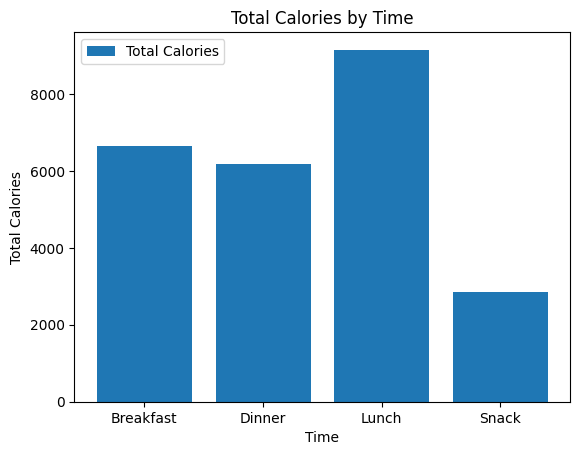

In [71]:
# Plotting

import matplotlib.pyplot as plt
plotdata = combineData.groupby("time_of_day")["Intake"].sum()
plt.bar(plotdata.index, plotdata.values)
plt.title('Total Calories by Time')
plt.xlabel('Time')
plt.ylabel('Total Calories')
plt.legend(['Total Calories'])
plt.show()

In [74]:
# Write a code to find rows which contain the item name as pasta
combineData['ifpasta'] = combineData['Item'].str.find('Pasta')
combineData[combineData['ifpasta'] > -1]

,Item,TimeId,Intake,Date New,time_of_day,meals,ifpasta
81,Pasta,4.0,250.0,2024-01-02,Dinner,big_meal,0
94,Pasta,4.0,250.0,2024-01-07,Dinner,big_meal,0
